<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Dogecoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf


In [3]:
# Dogecoin prediction

In [4]:
# Bringing data from yfinance to dataframe - Dogecoin
df = yf.download('DOGE-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Checking data in dataframe
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27 00:00:00+00:00,0.086365,0.087746,0.084525,0.087123,0.087123,400056534
2023-01-28 00:00:00+00:00,0.087124,0.092969,0.087124,0.087788,0.087788,642333816
2023-01-29 00:00:00+00:00,0.087783,0.090859,0.087544,0.090233,0.090233,458157342
2023-01-30 00:00:00+00:00,0.090221,0.091837,0.085399,0.088337,0.088337,787132771
2023-02-01 00:00:00+00:00,0.096599,0.096599,0.094346,0.095167,0.095167,1334281344


In [6]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

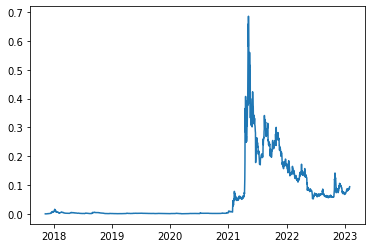

In [7]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [8]:
# length of dataframe
len(df)

1910

In [9]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [10]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[0.0014149999478831887,
 0.0011630000080913305,
 0.0012009999481961131,
 0.0010379999876022339,
 0.0012110000243410468,
 0.0011840000515803695,
 0.0013389999512583017,
 0.0013899999903514981,
 0.0013129999861121178,
 0.0013729999773204327,
 0.0013760000001639128,
 0.0013940000208094716,
 0.0013889999827370048,
 0.0018230000277981162,
 0.0018909999635070562,
 0.0019079999765381217,
 0.0020719999447464943,
 0.0020260000601410866,
 0.001988000003620982,
 0.002363000065088272,
 0.0020800000056624413,
 0.002078999998047948,
 0.002148000057786703,
 0.0021490000654011965,
 0.002222999930381775,
 0.0024629998952150345,
 0.0024790000170469284,
 0.0026630000211298466,
 0.0027199999894946814,
 0.002778999973088503,
 0.002616999903693795,
 0.0025470000691711903,
 0.0027979998849332333,
 0.00330400001257658,
 0.003461000043898821,
 0.0037090000696480274,
 0.0037620000075548887,
 0.005932999774813652,
 0.00598399993032217,
 0.006432999856770039,
 0.005665999837219715,
 0.006661000195890665,
 0.00742

In [11]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[0.18510299921035767,
 0.17717599868774414,
 0.1711450070142746,
 0.16548499464988708,
 0.16235600411891937,
 0.15520399808883667,
 0.14263999462127686,
 0.13289199769496918,
 0.14186300337314606,
 0.1377979964017868,
 0.14304900169372559,
 0.14378899335861206,
 0.1412470042705536,
 0.14165599644184113,
 0.1430560052394867,
 0.13947099447250366,
 0.1418049931526184,
 0.14263099431991577,
 0.13723500072956085,
 0.1375409960746765,
 0.14750300347805023,
 0.1471409946680069,
 0.15376999974250793,
 0.1655779927968979,
 0.15840500593185425,
 0.1591230034828186,
 0.15188899636268616,
 0.14484700560569763,
 0.14440500736236572,
 0.14894799888134003,
 0.14600299298763275,
 0.151760995388031,
 0.14909499883651733,
 0.1385519951581955,
 0.1387680023908615,
 0.14120599627494812,
 0.13686800003051758,
 0.12849000096321106,
 0.13155299425125122,
 0.12784600257873535,
 0.12381300330162048,
 0.12757599353790283,
 0.12764699757099152,
 0.12311100214719772,
 0.13315600156784058,
 0.1339379996061325,
 0

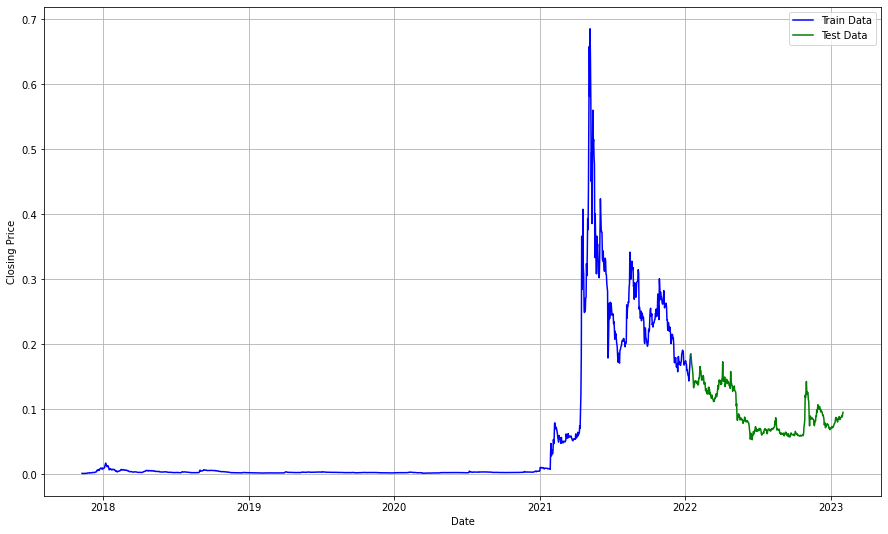

In [12]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [13]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [14]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [15]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1908
Model:                 ARIMA(4, 1, 0)   Log Likelihood                5760.843
Method:                       css-mle   S.D. of innovations              0.012
Date:                Wed, 01 Feb 2023   AIC                         -11509.685
Time:                        02:45:51   BIC                         -11476.362
Sample:                             1   HQIC                        -11497.421
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.579e-05      0.000      0.154      0.878      -0.001       0.001
ar.L1.D.y     -0.1288      0.023     -5.633      0.000      -0.174      -0.084
ar.L2.D.y      0.0805      0.023      3.506      0.0

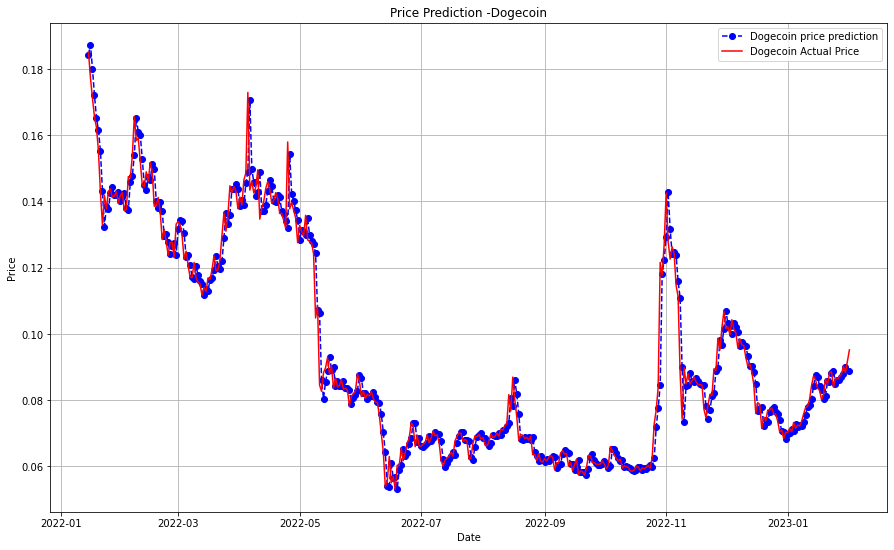

In [16]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Dogecoin price prediction')
plt.plot(start_date, test, color ='red', label ='Dogecoin Actual Price')
plt.title('Price Prediction -Dogecoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.03533252402509034


MAPE of 3.5% implies the model is 96.5% accurate in predicting the test obeservations

In [18]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 0.0942354434467267
Mean Squared Error: 0.005480327200902484


In [19]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 0.09443916943958669
Prediction 0.17427794551860276
Prediction 0.18605388451403118
Prediction 0.18010688482941248
Prediction 0.16912281410381086
